In [137]:
import numpy as np
import json
import random
import torch
from gensim.models import Word2Vec

In [359]:
def word2int():
    word_int_dic ={} 
    with  open('../chars.txt','r',encoding='utf-8') as fq:
        for id1,word in enumerate(fq):
            word_int_dic[word.strip()]=id1
    return word_int_dic 
def tran_sentence_int(sentence_len,path):
    sentence_len =sentence_len
    sentens_li =[]
    word_int_dic  = word2int()
    with open(path,'r',encoding='utf-8') as fq:
        for lines in fq: 
            questions= json.loads(lines)['questions']
            words_li =[]
            for question in questions:
                word_li=[0]*sentence_len
                for ind1,word in enumerate(list(question)):
                    if ind1<sentence_len:
                        word_li[ind1] = word_int_dic.get(word,word_int_dic['[UNK]'])
                words_li.append(word_li)
            sentens_li.append(words_li)
    return sentens_li

In [361]:
word_int_dic = word2int()

In [360]:
path ='../data/train.json'
sentence_len = 8
one_zero_rate =0.5

In [319]:
sentens_li = tran_sentence_int(sentence_len,path)
tran_data_all =[]
for i  in  range(1000):
    tran_data=[]
    #正样本
    if np.random.rand()>one_zero_rate:
        sentens_class = random.sample(sentens_li,1)[0]
        if len(sentens_class)<2:
            print(len(sentens_class))
        else:
            tran_data.extend(random.sample(sentens_class,2))
            tran_data = [torch.LongTensor(i) for i in tran_data]
            tran_data.extend(torch.LongTensor([1]))
    #负样本
    else:
        sentens_class1,sentens_class2 = random.sample(sentens_li,2)
        tran_data = [torch.LongTensor(random.sample(sentens_class1,1)[0])
        ,torch.LongTensor(random.sample(sentens_class2,1)[0])
        ,torch.LongTensor([-1])]
    tran_data_all.append(tran_data)
        

1


In [348]:
with open("../data/valid.json",'r',encoding='utf-8') as fq:
    for i in fq:
        print(i)
        print(json.load(fq))
        break

["其他业务", "宽泛业务问题"]


JSONDecodeError: Extra data: line 2 column 1 (char 19)

In [353]:
valid_path='../data/valid.json'
schema_path='../data/schema.json'

In [355]:
with open(schema_path, 'r', encoding='utf-8') as fq:
        schema_class = json.load(fq)
test_li=[]    
with open(valid_path,'r',encoding='utf-8') as fq:
    for lines in fq:
        test_li.append(json.loads(lines))
test_int_li=[]
for _test in test_li:
    word_li = [0]*sentence_len
    for ind,word in enumerate((_test[0])):
        if ind<=sentence_len:
            word_li[ind] = word_int_dic.get(word,word_int_dic['[UNK]'])
    
    test_int_li.append([word_li,schema_class.get(_test[1])]) 
        

In [368]:
torch.tensor(word_li)

tensor([436, 264, 172, 542,   0,   0,   0,   0])

In [365]:
   
        
 
    break

In [395]:
class MyCustomClass:
    def __init__(self, items,type):
        self.items = items   
        if type=='你好':
            self.add1()
        else:
            pass
    def  add1(self):
        self.items+=[2333]
    def __getitem__(self, key):
        return self.items[key]

In [398]:
a = MyCustomClass([100,1000],'你1好')

In [392]:
a.add1()

In [399]:
a[2]

IndexError: list index out of range

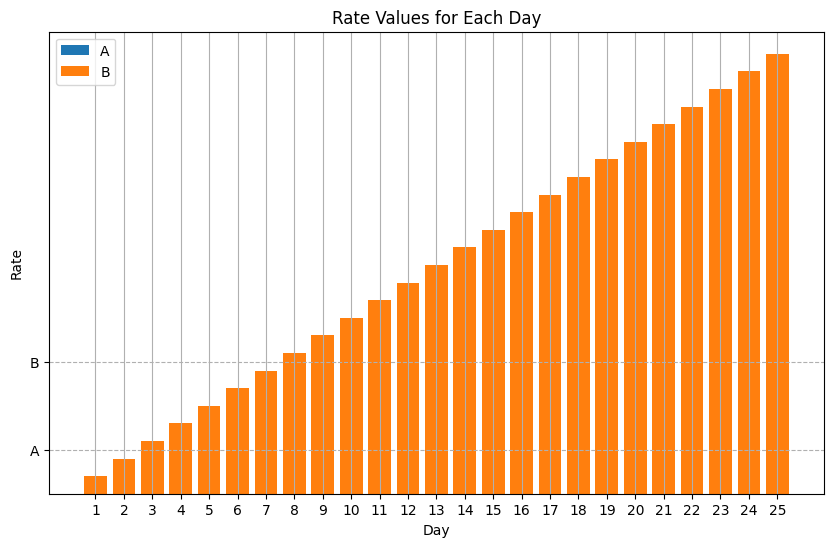

In [405]:
import matplotlib.pyplot as plt

# 创建数据
days = list(range(1, 26))  # 横坐标从1到25
rate_values = [i * 0.1 for i in days]  # 假设的rate值，从0.1到2.5

# 纵坐标标签
categories = ["A", "B"]

# 创建图表
plt.figure(figsize=(10, 6))

# 绘制条形图，每个横坐标绘制两次，一次对应"你好"，一次对应"再见"
for i, category in enumerate(categories):
    plt.bar(days, [rate * (i + 1) for rate in rate_values], label=category)

# 设置图例
plt.legend()

# 设置纵坐标标签
plt.yticks([0.5 + i for i in range(len(categories))], categories)

# 设置横坐标标签和标题
plt.xticks(days)
plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Rate Values for Each Day')

# 显示x轴和y轴的网格线
plt.grid(axis='x')
plt.grid(axis='y', linestyle='--')

# 显示图表
plt.show()

In [1]:
from   config   import config

In [2]:
config 

{'train_path': '../data/train.json',
 'vocab_path': '../data/chars.txt',
 'valid_path': '../data/valid.json',
 'schema_path': '../data/schema.json',
 'batch_size': 128,
 'sentence_len': 8,
 'one_zero_rate': 0.5,
 'all_train_data_size': 1000,
 'hidden_size': 128}

In [7]:
import torch

# 假设有两个形状为 (2, 3) 的张量
tensor1 = torch.tensor([[1, 2, 3], [4, 5, 6]])
tensor2 = torch.tensor([[7, 8, 9], [10, 11, 12]])

# 计算逐元素乘积
elementwise_product = torch.mul(tensor1, tensor2)

# 对每个 "features" 组的元素乘积求和
sum_of_products = torch.sum(elementwise_product, axis=-1)

print("Elementwise Product:\n", elementwise_product)
print("Sum of Products:\n", sum_of_products)
    

Elementwise Product:
 tensor([[ 7, 16, 27],
        [40, 55, 72]])
Sum of Products:
 tensor([ 50, 167])


In [16]:
import torch

# 假设有两个形状为 (3, 4) 的张量
tensor1 = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
tensor2 = torch.tensor([[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]])

# 计算逐元素乘积
elementwise_product = torch.mul(tensor1, tensor2)

# 对每个最后一个维度的元素乘积求和
sum_of_products = torch.sum(elementwise_product, axis=1)

print("Elementwise Product:\n", elementwise_product)
print("Sum of Products:\n", sum_of_products)

Elementwise Product:
 tensor([[ 13,  28,  45,  64],
        [ 85, 108, 133, 160],
        [189, 220, 253, 288]])
Sum of Products:
 tensor([150, 486, 950])


In [26]:
import torch
import torch.nn.functional as F

# 定义一个形状为 (3, 2) 的张量
tensor1 = torch.tensor([[1.0, 3.0],
                        [3.0, 4.0],
                        [5.0, 6.0]])

# 沿着最后一个维度 (dim=-1) 进行归一化
normalized_tensor = F.normalize(tensor1, dim=0)

print("Original Tensor:\n", tensor1)
print("Normalized Tensor:\n", normalized_tensor)

Original Tensor:
 tensor([[1., 3.],
        [3., 4.],
        [5., 6.]])
Normalized Tensor:
 tensor([[0.1690, 0.3841],
        [0.5071, 0.5121],
        [0.8452, 0.7682]])


In [27]:
import torch
import torch.nn.functional as F

# 定义一个形状为 (3, 4) 的张量，3 个样本，每个样本有 4 个特征
tensor1 = torch.tensor([[1.0, 2.0, 3.0, 4.0],
                        [5.0, 6.0, 7.0, 8.0],
                        [9.0, 10.0, 11.0, 12.0]])

# 使用 dim=-1 归一化，即沿着最后一个维度，每个样本的 4 个特征分别归一化
normalized_tensor_dim_neg1 = F.normalize(tensor1, dim=-1)

# 使用 dim=0 归一化，即沿着第一个维度，4 个特征在所有样本上的值分别归一化
normalized_tensor_dim_0 = F.normalize(tensor1, dim=0)

print("Original Tensor:\n", tensor1)
print("Normalized Tensor (dim=-1):\n", normalized_tensor_dim_neg1)
print("Normalized Tensor (dim=0):\n", normalized_tensor_dim_0)

Original Tensor:
 tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])
Normalized Tensor (dim=-1):
 tensor([[0.1826, 0.3651, 0.5477, 0.7303],
        [0.3790, 0.4549, 0.5307, 0.6065],
        [0.4262, 0.4735, 0.5209, 0.5682]])
Normalized Tensor (dim=0):
 tensor([[0.0967, 0.1690, 0.2242, 0.2673],
        [0.4834, 0.5071, 0.5232, 0.5345],
        [0.8701, 0.8452, 0.8222, 0.8018]])


In [31]:
import torch
import torch.nn.functional as F

# 定义一个形状为 (3, 4) 的张量，3 个样本，每个样本有 4 个特征
tensor1 = torch.tensor([1.0, 2.0, 3.0, 4.0])

# 使用 dim=-1 归一化，即沿着最后一个维度，每个样本的 4 个特征分别归一化
normalized_tensor_dim_neg1 = F.normalize(tensor1, dim=-1)

# 使用 dim=0 归一化，即沿着第一个维度，4 个特征在所有样本上的值分别归一化
normalized_tensor_dim_0 = F.normalize(tensor1, dim=0)

print("Original Tensor:\n", tensor1)
print("Normalized Tensor (dim=-1):\n", normalized_tensor_dim_neg1)
print("Normalized Tensor (dim=0):\n", normalized_tensor_dim_0)

Original Tensor:
 tensor([1., 2., 3., 4.])
Normalized Tensor (dim=-1):
 tensor([0.1826, 0.3651, 0.5477, 0.7303])
Normalized Tensor (dim=0):
 tensor([0.1826, 0.3651, 0.5477, 0.7303])


In [30]:
a

650

In [1]:
from  config import config

In [2]:
import torch

# 定义列表
data = [[1149, 2859, 1413, 219, 0, 0, 0],
        [2230, 3732, 311, 1149, 2859, 0, 0],
        [2000, 156, 163, 1149, 2859, 0, 0]]

# 转换为 Tensor
tensor_data = [torch.tensor(i) for i in data]

# 查看 Tensor 的内容
print(tensor_data)


[tensor([1149, 2859, 1413,  219,    0,    0,    0]), tensor([2230, 3732,  311, 1149, 2859,    0,    0]), tensor([2000,  156,  163, 1149, 2859,    0,    0])]


In [1]:
a = [[1],[3],[4]]

In [9]:
if torch.cuda.is_available():
    print(1)

In [2]:
if a:
    print(1)

1


In [9]:
torch.Tensor(a).squeeze().squeeze()


tensor([1., 3., 4.])

In [11]:
 a = [[[1799,  163, 2689, 3250,  999, 4441,    0]],
 [[1374,  360,    0,    0,    0,    0,    0],
  [ 164, 1497,  448,  329, 2675, 1374,  360]],
 [[1149, 2859, 1413,  219,    0,    0,    0],
  [2230, 3732,  311, 1149, 2859,    0,    0],
[2000,  156,  163, 1149, 2859,    0,    0]]]

In [12]:
a = torch.Tensor(a) for i in a

ValueError: expected sequence of length 1 at dim 1 (got 2)

In [15]:
a = torch.Tensor([1149, 2859, 1413,  219,    0,    0,    0])
b = torch.Tensor([1149, 2859,1111,  219,    0,    0,    0])
c = torch.Tensor([1111, 2859, 1413,  219,    0,    0,    0])

In [18]:
a1 = [a,b,c]
a2 = [b,c]
a3 = [a,c]

In [49]:
a4=[a1,a2,a3]

In [50]:
a4

[[tensor([1149., 2859., 1413.,  219.,    0.,    0.,    0.]),
  tensor([1149., 2859., 1111.,  219.,    0.,    0.,    0.]),
  tensor([1111., 2859., 1413.,  219.,    0.,    0.,    0.])],
 [tensor([1149., 2859., 1111.,  219.,    0.,    0.,    0.]),
  tensor([1111., 2859., 1413.,  219.,    0.,    0.,    0.])],
 [tensor([1149., 2859., 1413.,  219.,    0.,    0.,    0.]),
  tensor([1111., 2859., 1413.,  219.,    0.,    0.,    0.])]]

In [55]:

import random
_sentens_li = a4.copy()
first_choice = random.sample(_sentens_li, 1)[0]  # 第一次随机选择
_sentens_li = [x for x in _sentens_li if id(x) != id(first_choice)]

In [65]:
for i in _sentens_li:
    print(id(i))
    

2183522278784
2183522739904
2183522278976


In [66]:
a1 = random.sample(_sentens_li, 1)

In [67]:
id(a1[0]),a1[0]

(2183522278976,
 [tensor([1149., 2859., 1413.,  219.,    0.,    0.,    0.]),
  tensor([1111., 2859., 1413.,  219.,    0.,    0.,    0.])])

In [40]:
torch.equal(id(first_choice),first_choice1)

TypeError: equal(): argument 'input' (position 1) must be Tensor, not list

In [41]:
id(first_choice)


2183522739904